# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [17]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if action == "suck": 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [18]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: west
step 2 - action: north
step 3 - action: north
step 4 - action: south
step 5 - action: north
step 6 - action: east
step 7 - action: south
step 8 - action: east
step 9 - action: suck
step 10 - action: east
step 11 - action: west
step 12 - action: south
step 13 - action: north
step 14 - action: east
step 15 - action: east
step 16 - action: east
step 17 - action: suck
step 18 - action: north
step 19 - action: north


2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [134]:
def simple_environment_n(agent, initial_position, n, verbose = True):
    if verbose:
        print(initial_position[0], initial_position[1])
    
    # initialize environment
    clean_dirty_probability = [False, False, False, False, True] # picking randomly from this list gives 0.2 probability of dirty square
    performance_measure = 0
    env = []    
    
    for i in range(n): # initializing the layout with 20% chance of dirty square
        col = []
        for j in range(n):
            cell_value = np.random.choice(clean_dirty_probability)
            if cell_value:
                performance_measure += 1
            col.append(cell_value)
        env.append(col)
    
    if verbose:
        print(env)
    
    # environment agent interaction
    position = initial_position # initial position of robot -> to be updated at each iteration of movement
    
    num_cleaned = 0
    num_actions = 0
    
    if verbose:
        print("# of dirty squares: ", performance_measure)

    # running the environment    
    while num_cleaned < performance_measure:
        if position[0] == 0:
            bumpers["north"] = True
        else:
            bumpers["north"] = False
        if position[0] == n - 1:
            bumpers["south"] = True
        else:
            bumpers["south"] = False
        if position[1] == 0:
            bumpers["west"] = True
        else:
            bumpers["west"] = False
        if position[1] == n - 1:
            bumpers["east"] = True
        else:
            bumpers["east"] = False
        
        action = agent(bumpers, env[position[0]][position[1]])
        if action != "suck" and bumpers[action]:
            num_actions += 1 # this will only be called for simple random agent as bumping into a wall repeatedly will count as actions
            if verbose:
                print("step ", num_actions)
                print("location: ", position)
                print("current position: ", bumpers)
                print("action: ", action)
                print("agent bumped the wall")
            continue
        
        num_actions += 1
        
        if verbose:
            print("step ", num_actions)
            print("location: ", position)
            print("current position: ", bumpers)
            print("action: ", action)
            
        if action == "suck":
            if env[position[0]][position[1]]:   # check if the current position to be 'sucked' is dirty
                env[position[0]][position[1]] = False # cleaned square is now marked clean
                num_cleaned += 1
        else:
            if action == "north":
                position[0] -= 1
            elif action == "south":
                position[0] += 1
            elif action == "west":
                position[1] -= 1
            elif action == "east":
                position[1] += 1
            else:
                print("location unclear")
        
        if verbose:
            print("# cleaned: ", num_cleaned)
    return num_actions

In [135]:
init_position = [1,1]
simple_environment_n(simple_randomized_agent, init_position, 5, verbose=False)

462

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [115]:
# Your code and description goes here
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"
    actions = []
    for key in bumpers:
        if not bumpers[key]:
            actions.append(key)
    
    return np.random.choice(actions)

In [136]:
init_position = [1,1]
simple_environment_n(simple_reflex_agent, init_position, 5, verbose=False)

131

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [121]:
# Your short description of the state and your implementation goes here

"""
    This model based agent uses states to keep track of locations that are important for navigation.
    
    state_position (int): keeps track of how many positions the robot has traversed since making it to the optimal starting point. Value of state_position <= (n x n) by the time the entire grid is clean.
    
    state_optimal_position (bool): this lets the robot know wheter it has arrived at the optimal starting point. the robot starts at a random position and if !state_optimal_position, it first traverses to the optimal position to start the cleaning process. The optimal position is cell[0][0] or the upper-most left position (touching north and western wall). 
    
    state_east_turn (bool), state_west_turn (bool): these flags let the robot know which horizontal direction it needs to traverse. Only one of those two flags should be True at any given moment, and once it has reached the end of the current row, it will attempt to go south. Once it moves south to the next row, the flags will flip and it will traverse horizontally again in opposite direction as it did in the row above. 
 
"""

'\n    This model based agent uses states to keep track of locations that are important for navigation.\n    \n    state_position (int): keeps track of how many positions the robot has traversed since making it to the optimal starting point. Value of state_position <= (n x n) by the time the entire grid is clean.\n    \n    state_optimal_position (bool): this lets the robot know wheter it has arrived at the optimal starting point. the robot starts at a random position and if !state_optimal_position, it first traverses to the optimal position to start the cleaning process. The optimal position is cell[0][0] or the upper-most left position (touching north and western wall). \n    \n    state_east_turn (bool), state_west_turn (bool): these flags let the robot know which horizontal direction it needs to traverse. Only one of those two flags should be True at any given moment, and once it has reached the end of the current row, it will attempt to go south. Once it moves south to the next ro

In [253]:
# Your code goes here
class model_based_agent:
    def __init__(self, name) -> None:
        self.state_name = name
        self.state_position = 0
        self.state_optimal_position = False
        self.state_east_turn = False
        self.state_west_turn = False
    
    def return_state_position(self):
        return self.state_position
        
    def act(self, bumpers, dirty):
        # optimal position is [0, 0] in the matrix. Model based agent will traverse up and to the left until this is achieved
        if not self.state_optimal_position:
            if not bumpers['north']:
                return "north"
            elif not bumpers['west']:
                return 'west'
            else:
                self.state_optimal_position = True
                self.state_east_turn = True
                self.state_position += 1
        
        # once robot is at the optimal position, it goes to the right until the eastern wall, then moves down once, and then to the left until the western wall. 
        # once robot has traversed the row horizontally and can no longer go down due to the southern wall, it is finished.
        if dirty:
            return 'suck'
        
        if self.state_east_turn:
            if not bumpers['east']:
                self.state_position += 1
                return 'east'
            else:
                # robot has arrived at the eastern-most point of the grid. it will now attempt to go south and traverse west
                self.state_east_turn = False
                if not bumpers['south']:
                    self.state_position += 1
                    self.state_west_turn = True
                    return 'south'
                else:
                    print("something went wrong: all dirt should be clean")
                    print("shutting down the robot...")
                    return
        elif self.state_west_turn:
            if not bumpers['west']:
                self.state_position += 1
                return 'west'
            else:
                # robot has arrived at the western-most point of the grid. it will not attemp to go south and traverse east
                self.state_west_turn = False
                if not bumpers['south']:
                    self.state_position += 1
                    self.state_east_turn = True
                    return 'south'
                else:
                    print("something went wrong: all dirt should be clean")
                    print("shutting down the robot...")
                    return
        
        else:
            print("something went wrong")
                

In [174]:
init_position = [4,4]
mba = model_based_agent("agent 1")
simple_environment_n(mba.act, init_position, 5, verbose=True)
# print("final position count: ", mba.return_state_position())

4 4
[[False, False, False, True, False], [False, False, False, True, False], [True, False, False, False, False], [True, False, False, True, True], [False, False, False, False, False]]
# of dirty squares:  6
step  1
location:  [4, 4]
current position:  {'north': False, 'east': True, 'south': True, 'west': False}
action:  north
# cleaned:  0
step  2
location:  [3, 4]
current position:  {'north': False, 'east': True, 'south': False, 'west': False}
action:  north
# cleaned:  0
step  3
location:  [2, 4]
current position:  {'north': False, 'east': True, 'south': False, 'west': False}
action:  north
# cleaned:  0
step  4
location:  [1, 4]
current position:  {'north': False, 'east': True, 'south': False, 'west': False}
action:  north
# cleaned:  0
step  5
location:  [0, 4]
current position:  {'north': True, 'east': True, 'south': False, 'west': False}
action:  west
# cleaned:  0
step  6
location:  [0, 3]
current position:  {'north': True, 'east': False, 'south': False, 'west': False}
action:  

33

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [178]:
import random
# Your code goes here
data_5 = {
    'randomized_agent': 0,
    'simple_reflex_agent': 0,
    'model_based_agent': 0
}
data_10 = {
    'randomized_agent': 0,
    'simple_reflex_agent': 0,
    'model_based_agent': 0
}
data_100 = {
    'randomized_agent': 0,
    'simple_reflex_agent': 0,
    'model_based_agent': 0
}

In [179]:
n = 5
init_position = [random.randint(0, n - 1), random.randint(0, n - 1)]
for i in range(100):
    data_5['randomized_agent'] += simple_environment_n(simple_randomized_agent, init_position, n, verbose=False)
data_5['randomized_agent'] /= 100
print(data_5['randomized_agent'])

for i in range(100):
    data_5['simple_reflex_agent'] += simple_environment_n(simple_reflex_agent, init_position, n, verbose=False)
data_5['simple_reflex_agent'] /= 100
print(data_5['simple_reflex_agent'])

for i in range(100):
    mba_test = model_based_agent("agent test")
    data_5['model_based_agent'] += simple_environment_n(mba_test.act, init_position, n, verbose=False)
data_5['model_based_agent'] /= 100
print(data_5['model_based_agent'])

429.25
104.79
30.94


In [180]:
n = 10
init_position = [random.randint(0, n - 1), random.randint(0, n - 1)]
for i in range(100):
    data_10['randomized_agent'] += simple_environment_n(simple_randomized_agent, init_position, n, verbose=False)
data_10['randomized_agent'] /= 100
print(data_10['randomized_agent'])

for i in range(100):
    data_10['simple_reflex_agent'] += simple_environment_n(simple_reflex_agent, init_position, n, verbose=False)
data_10['simple_reflex_agent'] /= 100
print(data_10['simple_reflex_agent'])

for i in range(100):
    mba_test = model_based_agent("agent test")
    data_10['model_based_agent'] += simple_environment_n(mba_test.act, init_position, n, verbose=False)
data_10['model_based_agent'] /= 100
print(data_10['model_based_agent'])

2998.28
950.04
126.41


In [183]:
n = 100
init_position = [random.randint(0, n - 1), random.randint(0, n - 1)]
# for i in range(100):
#     data_100['randomized_agent'] += simple_environment_n(simple_randomized_agent, init_position, n, verbose=False)
# data_100['randomized_agent'] /= 100
# print(data_100['randomized_agent'])

for i in range(100):
    data_100['simple_reflex_agent'] += simple_environment_n(simple_reflex_agent, init_position, n, verbose=False)
data_100['simple_reflex_agent'] /= 100
print(data_100['simple_reflex_agent'])

for i in range(100):
    mba_test = model_based_agent("agent test")
    data_100['model_based_agent'] += simple_environment_n(mba_test.act, init_position, n, verbose=False)
data_100['model_based_agent'] /= 100
print(data_100['model_based_agent'])

340511.31
12096.85


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |429.25 |104.79 |30.94 |
| 10x10   |2998.28 |950.04 |126.41 |
| 100x100 |42806168? |340511.31 |12096.85 |

Add charts to compare the performance of the different agents.

In [198]:
import pandas as pd

df = pd.DataFrame(data_5, index=[5])
df2 = pd.DataFrame(data_10, index=[10])
df3 = pd.DataFrame(data_100, index=[100])

frames = [df, df2, df3]
result = pd.concat(frames)
result

,randomized_agent,simple_reflex_agent,model_based_agent
5,429.25,104.79,30.94
10,2998.28,950.04,126.41
100,42806168.00,340511.31,12096.85


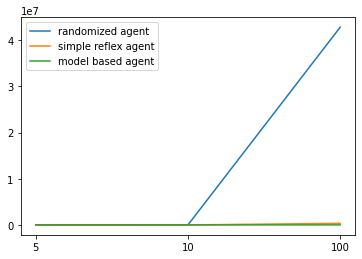

In [215]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt
x = [5, 10, 100]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.plot(default_x_ticks, result.randomized_agent, label="randomized agent")
plt.plot(default_x_ticks, result.simple_reflex_agent, label="simple reflex agent")
plt.plot(default_x_ticks, result.model_based_agent, label="model based agent")

plt.legend()
plt.show()

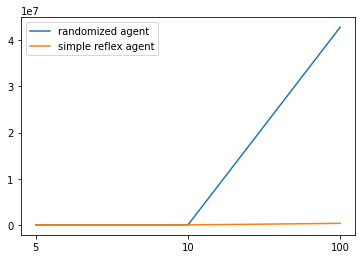

In [216]:
x = [5, 10, 100]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.plot(default_x_ticks, result.randomized_agent, label="randomized agent")
plt.plot(default_x_ticks, result.simple_reflex_agent, label="simple reflex agent")
# plt.plot(result.model_based_agent, label="model based agent")

plt.legend()
plt.show()

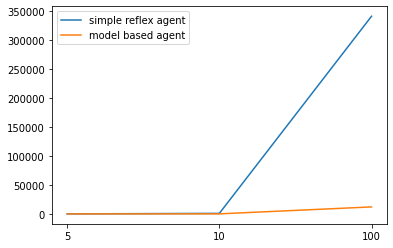

In [213]:
x = [5, 10, 100]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

# plt.plot(default_x_ticks, result.randomized_agent, label="randomized agent")
plt.plot(default_x_ticks, result.simple_reflex_agent, label="simple reflex agent")
plt.plot(default_x_ticks, result.model_based_agent, label="model based agent")

plt.legend()
plt.show()

Both simple agents grew exponentially with the increase in size of grid layout. One difference between the simple random agent and the simple reflex agent was the actual magnitude of growth. With 100 x 100 layout, the simple random agent could not even finish 100 runs and had to resort to being stopped at the 10 minute mark of runtime. The simple reflex agent, though grew exponentially, was still able to ultimately finish. As for my model-based agent, the size of the grid layout was not a great limiting factor. It was still able to traverse and finish cleaning the room  in a linear-like fashion

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [184]:
# Answer goes here
"""
1. 
    simple reflex agent: will perform exactly the way it does with a room with known size. This agent does not rely on previous knowledge of the room size but rather, solely relies on bumper percepts and dirt percepts. 
    model based agent: the way I designed my model-based agent, it will make no discernable difference whether the room size is known or not. It will still rely on bumper sensors to orient itself to the optimal starting position, and then from then on, make east and west progress as it steadily climbs down south until the whole room is clean.
2. 
    simple reflex agent: the shape of the room will have no impact on performance.
    model based agent: since my model-based agent relies on the consistent and regular shape of the room to orient itself as well as traverse itself, the irregular shape of the room will break my model-based agent and will most likely not be able to perform in an expected way.
3. 
    simple reflex agent: obstacles being present will have no impact on performance
    model based agent: my model-based agent relies on bumper percepts to orient itself as well as to traverse the grid. With obstables being present at random, my model-based agent will not be able to orient itself and will run the risk of not completely cleaning the grid as well as getting stuck during traversal.

"""

'\n1. \n    simple reflex agent: will perform exactly the way it does with a room with known size. This agent does not rely on previous knowledge of the room size but rather, solely relies on bumper percepts and dirt percepts. \n    model based agent: the way I designed my model-based agent, it will make no discernable difference whether the room size is known or not. It will still rely on bumper sensors to orient itself to the optimal starting position, and then from then on, make east and west progress as it steadily climbs down south until the whole room is clean.\n2. \n    simple reflex agent: the shape of the room will have no impact on performance.\n    model based agent: since my model-based agent relies on the consistent and regular shape of the room to orient itself as well as traverse itself, the irregular shape of the room will break my model-based agent and will most likely not be able to perform in an expected way.\n3. \n    simple reflex agent: obstacles being present wil

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [261]:
# Your code and discussion goes here
def simple_environment_obstacles(agent, initial_position, n, verbose = True):
    if verbose:
        print(initial_position[0], initial_position[1])
    
    # initialize environment
    clean_dirty_probability = [False, False, False, False, True]        # picking randomly from this list gives 0.2 probability of dirty square
    obstacle_square_probability = [False, False, False, False, False, False, False, False, False, True]    # picking randomly from this list gives 0.2 probability of obstacle square
    performance_measure = 0
    obstacle_count = 0
    env = []
    obstacle_env = []
    
    for i in range(n): # initializing the layout with 20% chance of dirty square
        col = []
        for j in range(n):
            cell_value = np.random.choice(clean_dirty_probability)
            if cell_value:
                performance_measure += 1
            col.append(cell_value)
        env.append(col)
    
    for i in range(n): # initializing the layout with 20% chance of obstacle square
        col = []
        for j in range(n):
            cell_value = np.random.choice(obstacle_square_probability)
            if (i == 2 and j == 2) or env[i][j]:   # guarantee that cell [2,2] will not be an obstacle square
                cell_value = False
            if cell_value:
                obstacle_count += 1
            col.append(cell_value)
        obstacle_env.append(col)
    
    if verbose:
        print(env)
    
    # environment agent interaction
    position = initial_position # initial position of robot -> to be updated at each iteration of movement
    
    num_cleaned = 0
    num_actions = 0
    
    if verbose:
        print("# of dirty squares: ", performance_measure)
        print('# of obstacle squares: ', obstacle_count)

    # running the environment    
    while num_cleaned < performance_measure:
        if position[0] == 0:
            bumpers["north"] = True
        else:
            if obstacle_env[position[0] - 1][position[1]]:
                bumpers["north"] = True
            else:
                bumpers["north"] = False
        if position[0] == n - 1:
            bumpers["south"] = True
        else:
            if obstacle_env[position[0] + 1][position[1]]:
                bumpers["south"] = True
            else:
                bumpers["south"] = False
        if position[1] == 0:
            bumpers["west"] = True
        else:
            if obstacle_env[position[0]][position[1] - 1]:
                bumpers["west"] = True
            else:
                bumpers["west"] = False
        if position[1] == n - 1:
            bumpers["east"] = True
        else:
            if obstacle_env[position[0]][position[1] + 1]:
                bumpers["east"] = True
            else:
                bumpers["east"] = False
            
        # account for obstacle squares and update bumpers dictionary
        
        action = agent(bumpers, env[position[0]][position[1]])
        if not action:
            return
        
        if action != "suck" and bumpers[action]:
            num_actions += 1 # this will only be called for simple random agent as bumping into a wall repeatedly will count as actions
            if verbose:
                print("step ", num_actions)
                print("location: ", position)
                print("current position: ", bumpers)
                print("action: ", action)
                print("agent bumped the wall")
            continue
        
        num_actions += 1
        
        if verbose:
            print("step ", num_actions)
            print("location: ", position)
            print("current position: ", bumpers)
            print("action: ", action)
            
        if action == "suck":
            if env[position[0]][position[1]]:   # check if the current position to be 'sucked' is dirty
                env[position[0]][position[1]] = False # cleaned square is now marked clean
                num_cleaned += 1
        else:
            if action == "north":
                position[0] -= 1
            elif action == "south":
                position[0] += 1
            elif action == "west":
                position[1] -= 1
            elif action == "east":
                position[1] += 1
            else:
                print("location unclear")
        
        if verbose:
            print("# cleaned: ", num_cleaned)
    return num_actions

In [256]:
init_position_obstacle = [2,2]
mba_obstacle = model_based_agent("obstacle agent")
print(simple_environment_obstacles(simple_randomized_agent, init_position_obstacle, 5, verbose=False))
print(simple_environment_obstacles(simple_reflex_agent, init_position_obstacle, 5, verbose=False))

246
232


In [ ]:
n = 5
init_position = [2, 2]
data_5['simple_reflex_agent'] = 0
data_5['simple_randomized_agent'] = 0
for i in range(100):
    data_5['randomized_agent'] += simple_environment_obstacles(simple_randomized_agent, init_position, n, verbose=False)
data_5['randomized_agent'] /= 100
print(data_5['randomized_agent'])

for i in range(100):
    data_5['simple_reflex_agent'] += simple_environment_obstacles(simple_reflex_agent, init_position, n, verbose=False)
data_5['simple_reflex_agent'] /= 100
print(data_5['simple_reflex_agent'])

for i in range(100):
    mba_test = model_based_agent("agent test")
    data_5['model_based_agent'] += simple_environment_obstacles(mba_test.act, init_position, n, verbose=False)
data_5['model_based_agent'] /= 100
print(data_5['model_based_agent'])

In [ ]:
n = 10
init_position = [random.randint(0, n - 1), random.randint(0, n - 1)]
for i in range(100):
    data_10['randomized_agent'] += simple_environment_n(simple_randomized_agent, init_position, n, verbose=False)
data_10['randomized_agent'] /= 100
print(data_10['randomized_agent'])

for i in range(100):
    data_10['simple_reflex_agent'] += simple_environment_n(simple_reflex_agent, init_position, n, verbose=False)
data_10['simple_reflex_agent'] /= 100
print(data_10['simple_reflex_agent'])

for i in range(100):
    mba_test = model_based_agent("agent test")
    data_10['model_based_agent'] += simple_environment_n(mba_test.act, init_position, n, verbose=False)
data_10['model_based_agent'] /= 100
print(data_10['model_based_agent'])

In [257]:
init_position_obstacle = [0,0]
mba_obstacle = model_based_agent("obstacle agent")
print(simple_environment_obstacles(mba_obstacle.act, init_position_obstacle, 5, verbose=False))

something went wrong: all dirt should be clean
shutting down the robot...
None


Even though the randomized agent and the simple agent finish in time comparable to an environment without obstacles, I was still not able to run them 100 times each and take average performance values with 20% probability of obstacles. I suspect that the obstacle layouts play a role in whether these simple agents are able to finish or not. I have designed the obstacles so that the center square will always be off limits so that I can always start my robot in the center square and avoid weird errors that can come from starting the robot in an obstacle square. I also ensured that obstacle squares will never overlap with dirty squares so that the performance measure can be reached. However, there could still be scenarios where randomized obstacle creation creates deadzones where a robot may either enter or start in that deadzone and has a hard time moving past said deadzone. This could happen in the corners of the grid where 2 directions are already blocked and the unfortunate addition of even one obstacle will reduce the chance of robot making it out of that area by 75%. With obstacles, simple agents are simply not good enough to navigate the grid.

As for my model-based agent, which relies on orientation and the east and western walls to navigate itself, adding obstacles randomly broke my robot. It relies entirely on bumpers to traverse itself linearly to the sides and down the grid and obstacles being present at random points disallows my model-based agent from orienting itself in the optimal starting position.

What would need to change is the ability of the robots to distinguish obstacles from walls. For example, a bumper that can be cut across in different directions would be registered as an obstacle and the robot will make the effort of finding the shortest path toward getting past it. Once past the obstacle, the robot would need to re-orient itself in order to continue moving the way it was designed to do. What this means in terms of my model-based agent is that for traversal, instead of simply stopping when it encounters a southern wall, it attempts to go left and right one square and try to go south again. This addition would allow my robot to determine whether a bumper is a true southern boundary or if it is an obstacle. The same goes for its western and eastern traversal. But for horizontal traversal, it would need to go south, move one square to the east or west depending on the directional flags, and then attempt to go north. 

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!